X1	net profit / total assets <br>
X2	total liabilities / total assets <br>
X3	working capital / total assets <br>
X4	current assets / short-term liabilities <br>
X5	[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365 <br>
X6	retained earnings / total assets <br>
X7	EBIT / total assets <br>
X8	book value of equity / total liabilities <br>
X9	sales / total assets <br>
X10	equity / total assets <br>
X11	(gross profit + extraordinary items + financial expenses) / total assets <br>
X12	gross profit / short-term liabilities <br>
X13	(gross profit + depreciation) / sales <br>
X14	(gross profit + interest) / total assets <br>
X15	(total liabilities * 365) / (gross profit + depreciation) <br>
X16	(gross profit + depreciation) / total liabilities <br>
X17	total assets / total liabilities <br>
X18	gross profit / total assets <br>
X19	gross profit / sales <br>
X20	(inventory * 365) / sales <br>
X21	sales (n) / sales (n-1) <br>
X22	profit on operating activities / total assets <br>
X23	net profit / sales <br>
X24	gross profit (in 3 years) / total assets <br>
X25	(equity - share capital) / total assets <br>
X26	(net profit + depreciation) / total liabilities <br>
X27	profit on operating activities / financial expenses <br>
X28	working capital / fixed assets <br>
X29	logarithm of total assets <br>
X30	(total liabilities - cash) / sales <br>
X31	(gross profit + interest) / sales<br> 
X32	(current liabilities * 365) / cost of products sold <br>
X33	operating expenses / short-term liabilities <br>
X34	operating expenses / total liabilities <br>
X35	profit on sales / total assets <br>
X36	total sales / total assets <br>
X37	(current assets - inventories) / long-term liabilities <br>
X38	constant capital / total assets <br>
X39	profit on sales / sales <br>
X40	(current assets - inventory - receivables) / short-term liabilities <br>
X41	total liabilities / ((profit on operating activities + depreciation) * (12/365)) <br>
X42	profit on operating activities / sales <br>
X43	rotation receivables + inventory turnover in days <br>
X44	(receivables * 365) / sales <br>
X45	net profit / inventory <br>
X46	(current assets - inventory) / short-term liabilities <br>
X47	(inventory * 365) / cost of products sold <br>
X48	EBITDA (profit on operating activities - depreciation) / total assets <br>
X49	EBITDA (profit on operating activities - depreciation) / sales <br>
X50	current assets / total liabilities <br>
X51	short-term liabilities / total assets <br>
X52	(short-term liabilities * 365) / cost of products sold) <br>
X53	equity / fixed assets <br>
X54	constant capital / fixed assets <br>
X55	working capital <br>
X56	(sales - cost of products sold) / sales <br>
X57	(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation) <br>
X58	total costs /total sales <br>
X59	long-term liabilities / equity <br>
X60	sales / inventory <br>
X61	sales / receivables <br>
X62	(short-term liabilities *365) / sales <br>
X63	sales / short-term liabilities <br>
X64	sales / fixed assets<br>

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE 
from collections import Counter
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipline_imb
from fancyimpute import  KNN
from sklearn.preprocessing import StandardScaler
import warnings
import impyute
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
%pylab inline
import warnings

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

warnings.filterwarnings("ignore")
pd.options.display.max_rows = 999

Populating the interactive namespace from numpy and matplotlib


In [60]:
df=pd.read_csv('csv_result-5year.csv',index_col=0)

In [61]:
df.replace('?',np.nan,inplace=True)

In [62]:
df=df.astype('float')

In [63]:
df.shape

(5910, 65)

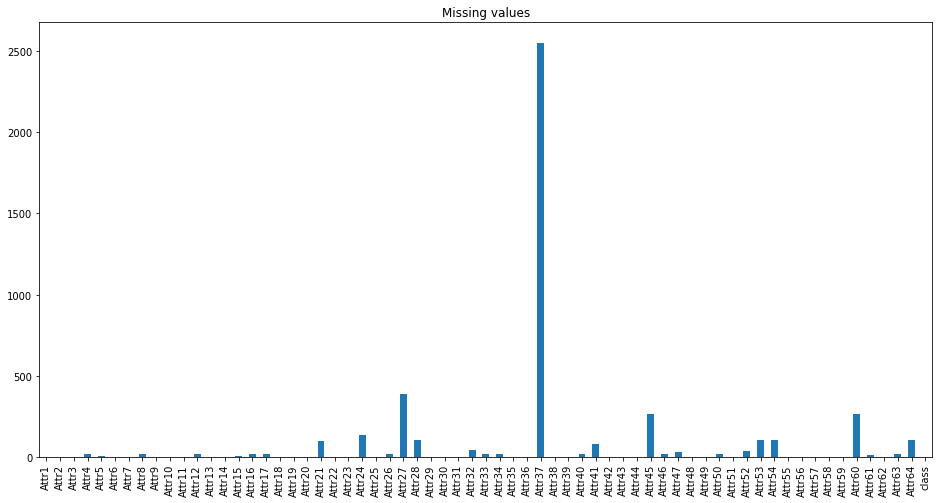

In [64]:
missing=df.isna().sum()
plt.figure(figsize=(16,8))
missing.plot.bar()
plt.title('Missing values')
plt.show()

# Create a machine learning algorithm to predict missing value

# Using KNN to estimate missing value

In [65]:
X=df.drop(['class'],axis=1)
y=df['class']

In [66]:
X_filled_knn = KNN(k=75).fit_transform(X)

Imputing row 1/5910 with 0 missing, elapsed time: 26.100
Imputing row 101/5910 with 1 missing, elapsed time: 26.113
Imputing row 201/5910 with 1 missing, elapsed time: 26.127
Imputing row 301/5910 with 0 missing, elapsed time: 26.137
Imputing row 401/5910 with 1 missing, elapsed time: 26.145
Imputing row 501/5910 with 0 missing, elapsed time: 26.148
Imputing row 601/5910 with 1 missing, elapsed time: 26.159
Imputing row 701/5910 with 1 missing, elapsed time: 26.164
Imputing row 801/5910 with 1 missing, elapsed time: 26.174
Imputing row 901/5910 with 0 missing, elapsed time: 26.185
Imputing row 1001/5910 with 3 missing, elapsed time: 26.190
Imputing row 1101/5910 with 0 missing, elapsed time: 26.200
Imputing row 1201/5910 with 1 missing, elapsed time: 26.208
Imputing row 1301/5910 with 1 missing, elapsed time: 26.217
Imputing row 1401/5910 with 1 missing, elapsed time: 26.224
Imputing row 1501/5910 with 0 missing, elapsed time: 26.231
Imputing row 1601/5910 with 0 missing, elapsed time:

In [67]:
#Normalization
scaler=StandardScaler()
X_filled_knn=scaler.fit_transform(X_filled_knn)

In [68]:
df_KNN=pd.DataFrame(X_filled_knn,columns=X.columns)

# Features selections 

In [69]:
corr=df_KNN.corr()

In [70]:
corr_matrix =corr.abs()

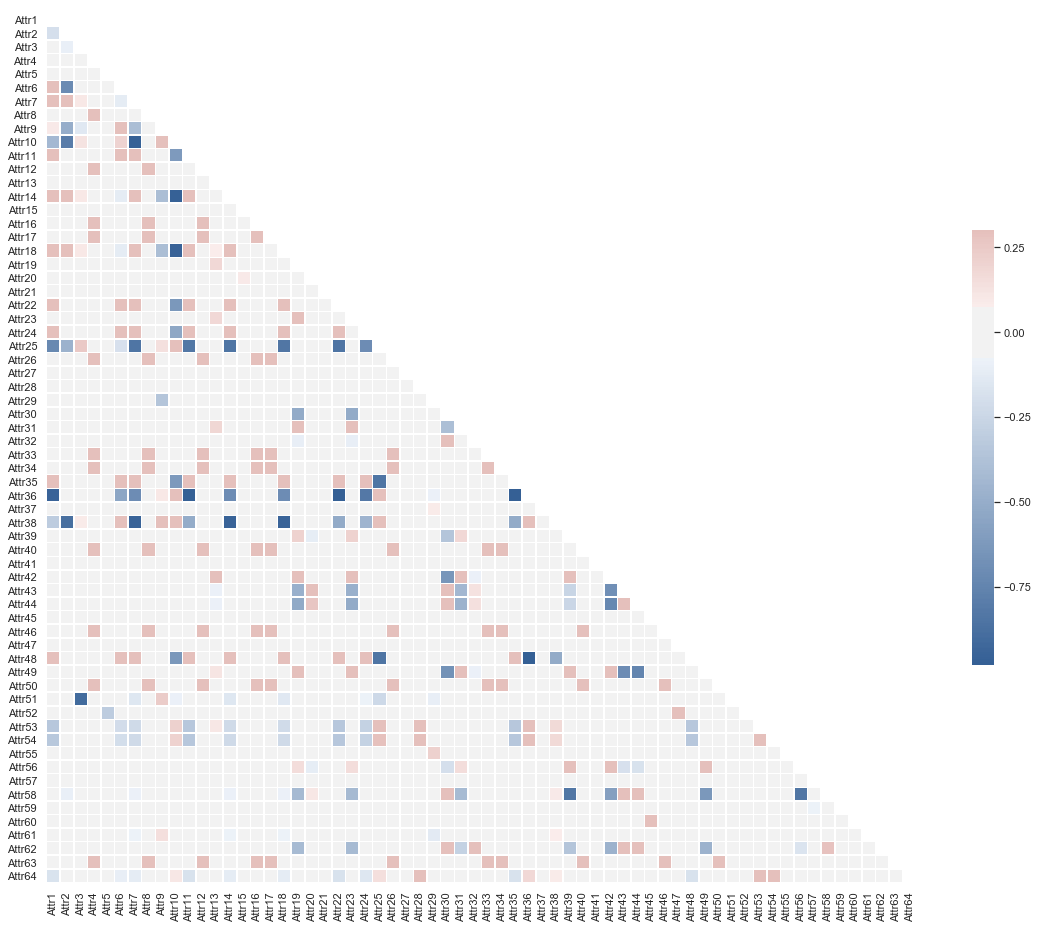

In [96]:
sns.set(style="white")
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 16))
cmap = sns.diverging_palette(250, 15, as_cmap=True,s=75, l=40,sep=20)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [71]:
#filter out features that are greater than threshold
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)) #upper matrix
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]  #drop correlation >0.8
df_important_features=df_KNN.drop(df_KNN[to_drop], axis=1)  # drop high correlated features

In [72]:
df_important_features.columns

Index(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr9',
       'Attr13', 'Attr15', 'Attr19', 'Attr20', 'Attr21', 'Attr27', 'Attr28',
       'Attr29', 'Attr30', 'Attr32', 'Attr37', 'Attr39', 'Attr41', 'Attr42',
       'Attr43', 'Attr45', 'Attr47', 'Attr52', 'Attr55', 'Attr57', 'Attr59',
       'Attr61'],
      dtype='object')

# Handling imbalance data

# Stratified CV and SMOTE and Data Modeling

In [98]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=2019)
pipe1=make_pipline_imb(SMOTE(random_state=2019),LogisticRegression(solver='lbfgs',random_state=2019)) 
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=2019)

In [99]:
#with SMOTE

#skf.get_n_splits(X,y)
accuracy_smote=[]
precision_smote=[]
recall_smote=[]
f1_smote=[]
auc_smote=[]
for train_index,test_index in skf.split(df_important_features,y):
    X_train,X_test=df_important_features.iloc[train_index].values,df_important_features.iloc[test_index].values
    y_train,y_test=y.iloc[train_index].values,y.iloc[test_index].values
    y_train,y_test=y_train.reshape(-1,1),y_test.reshape(-1,1)
    
    model=pipe1.fit(X_train,y_train.ravel())
    prediction=model.predict(X_test)
    
    accuracy_smote.append(pipe1.score(X_test,y_test))
    precision_smote.append(precision_score(y_test,prediction))
    recall_smote.append(recall_score(y_test,prediction))
    f1_smote.append(f1_score(y_test,prediction))
    #auc_smote.append(roc_auc_score(y_test,prediction))
print()
print("Logistic Regression")
print("Stratified Kfold score with SMOTE: \n")
print("Accuracy: {}".format(np.mean(accuracy_smote)))
print("Precision: {}".format(np.mean(precision_smote)))
print("Recall: {}".format(np.mean(recall_smote)))
print("f1: {}".format(np.mean(f1_smote)))


Logistic Regression
Stratified Kfold score with SMOTE: 

Accuracy: 0.7940778341793571
Precision: 0.2033217499810517
Recall: 0.673170731707317
f1: 0.31210840551327385


In [101]:
#without SMOTE
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=2019)
accuracy=[]
precision=[]
recall=[]
f1=[]
auc=[]
for train_index,test_index in skf.split(df_important_features,y):
    X_train,X_test=df_important_features.iloc[train_index].values,df_important_features.iloc[test_index].values
    y_train,y_test=y.iloc[train_index].values,y.iloc[test_index].values
    y_train,y_test=y_train.reshape(-1,1),y_test.reshape(-1,1)
    
    logreg=LogisticRegression(random_state=2019,solver='lbfgs')
    logreg.fit(X_train,y_train.ravel())
    prediction=logreg.predict(X_test)
    
    accuracy.append(logreg.score(X_test,y_test))
    precision.append(precision_score(y_test,prediction))
    recall.append(recall_score(y_test,prediction))
    f1.append(f1_score(y_test,prediction))
    #auc.append(roc_auc_score(y_test,prediction))
print()
print("Logistic Regression")
print("Stratified Kfold score without SMOTE: \n")
print("Accuracy: {}".format(np.mean(accuracy)))
print("Precision: {}".format(np.mean(precision)))
print("Recall: {}".format(np.mean(recall)))
print("f1: {}".format(np.mean(f1)))
print()


Logistic Regression
Stratified Kfold score without SMOTE: 

Accuracy: 0.9301184433164129
Precision: 0.4932900432900433
Recall: 0.07317073170731707
f1: 0.1260027756649618



In [124]:

#SMOTE with Decision Tree
pipe2=make_pipline_imb(SMOTE(random_state=2019),DecisionTreeClassifier(random_state=2019,max_depth=7))

accuracy_DT=[]
precision_DT=[]
recall_DT=[]
f1_DT=[]
auc_DT=[]
for train_index,test_index in skf.split(df_important_features,y):
    X_train,X_test=df_important_features.iloc[train_index].values,df_important_features.iloc[test_index].values
    y_train,y_test=y.iloc[train_index].values,y.iloc[test_index].values
    y_train,y_test=y_train.reshape(-1,1),y_test.reshape(-1,1)
    
    model=pipe2.fit(X_train,y_train.ravel())
    prediction=model.predict(X_test)
    
    accuracy_DT.append(pipe2.score(X_test,y_test))
    precision_DT.append(precision_score(y_test,prediction))
    recall_DT.append(recall_score(y_test,prediction))
    f1_DT.append(f1_score(y_test,prediction))
    #auc_DT.append(roc_auc_score(y_test,prediction))
    
    
    
    #try to plot decision tree
    #features = list(df_important_features.columns)
    #dot_data = StringIO()  
    #export_graphviz(pipe2, out_file=dot_data,feature_names=features,filled=True,rounded=True)

    #graph = pydot.graph_from_dot_data(dot_data.getvalue())  
    #Image(graph[0].create_png(),height=10000,width=10000) 
print()
print("Decision Tree")
print("Stratified Kfold score with SMOTE: \n")
print("Accuracy: {}".format(np.mean(accuracy_DT)))
print("Precision: {}".format(np.mean(precision_DT)))
print("Recall: {}".format(np.mean(recall_DT)))
print("f1: {}".format(np.mean(f1_DT)))


Decision Tree
Stratified Kfold score with SMOTE: 

Accuracy: 0.8326565143824027
Precision: 0.2489368854590733
Recall: 0.6780487804878049
f1: 0.3619057301260521


In [127]:
# Naive Bayers
from sklearn.naive_bayes import GaussianNB

pipe3=make_pipline_imb(SMOTE(random_state=2019),GaussianNB())

accuracy_NB=[]
precision_NB=[]
recall_NB=[]
f1_NB=[]
auc_NB=[]
for train_index,test_index in skf.split(df_important_features,y):
    X_train,X_test=df_important_features.iloc[train_index].values,df_important_features.iloc[test_index].values
    y_train,y_test=y.iloc[train_index].values,y.iloc[test_index].values
    y_train,y_test=y_train.reshape(-1,1),y_test.reshape(-1,1)
    
    model=pipe3.fit(X_train,y_train.ravel())
    prediction=model.predict(X_test)
    
    accuracy_NB.append(pipe3.score(X_test,y_test))
    precision_NB.append(precision_score(y_test,prediction))
    recall_NB.append(recall_score(y_test,prediction))
    f1_NB.append(f1_score(y_test,prediction))
    #auc_NB.append(roc_auc_score(y_test,prediction))
    
    
print()
print("Naive Bayers")
print("Stratified Kfold score with SMOTE: \n")
print("Accuracy: {}".format(np.mean(accuracy_NB)))
print("Precision: {}".format(np.mean(precision_NB)))
print("Recall: {}".format(np.mean(recall_NB)))
print("f1: {}".format(np.mean(f1_NB)))


Naive Bayers
Stratified Kfold score with SMOTE: 

Accuracy: 0.16920473773265648
Precision: 0.0720892913904875
Recall: 0.9243902439024388
f1: 0.13374598059899703


In [128]:
#SVM
from sklearn.svm import SVC

In [134]:
pipe4=make_pipline_imb(SMOTE(),SVC(random_state=2019,C=1))

accuracy_SVC=[]
precision_SVC=[]
recall_SVC=[]
f1_SVC=[]
auc_SVC=[]
for train_index,test_index in skf.split(df_important_features,y):
    X_train,X_test=df_important_features.iloc[train_index].values,df_important_features.iloc[test_index].values
    y_train,y_test=y.iloc[train_index].values,y.iloc[test_index].values
    y_train,y_test=y_train.reshape(-1,1),y_test.reshape(-1,1)
    
    model=pipe4.fit(X_train,y_train.ravel())
    prediction=model.predict(X_test)
    
    accuracy_SVC.append(pipe4.score(X_test,y_test))
    precision_SVC.append(precision_score(y_test,prediction))
    recall_SVC.append(recall_score(y_test,prediction))
    f1_SVC.append(f1_score(y_test,prediction))
    #auc_NB.append(roc_auc_score(y_test,prediction))
    
    
print()
print("Support Vector Machine")
print("Stratified Kfold score with SMOTE: \n")
print("Accuracy: {}".format(np.mean(accuracy_SVC)))
print("Precision: {}".format(np.mean(precision_SVC)))
print("Recall: {}".format(np.mean(recall_SVC)))
print("f1: {}".format(np.mean(f1_SVC)))


Support Vector Machine
Stratified Kfold score with SMOTE: 

Accuracy: 0.8106598984771575
Precision: 0.2155791903467026
Recall: 0.6536585365853659
f1: 0.3240348176155928
